In [2]:
# Import the Seaborn library for advanced statistical data visualization

import seaborn as sns 
%matplotlib inline    

In [ ]:
import pandas as pd

# Load my local dataset 
df = pd.read_csv("/Users/immd/Downloads/Lab3 machine/ house_prices.csv")


In [6]:
df.head()  
# Display the first 5 rows of the dataset to preview the data structure and columns


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


/var/folders/c6/lwx5dfhd39ggy32w8b66y2fw0000gn/T/ipykernel_8311/623931512.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price (in rupees)'])


<Axes: xlabel='Price (in rupees)', ylabel='Density'>

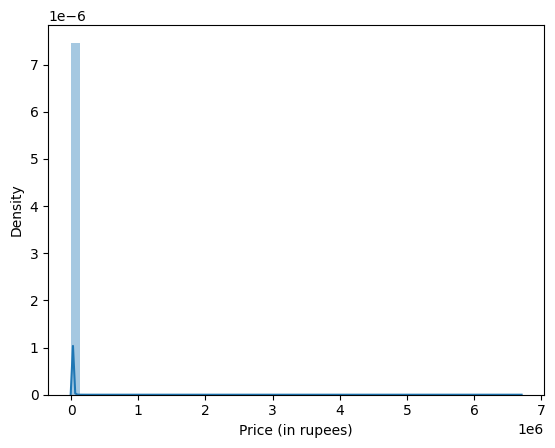

In [8]:
sns.distplot(df['Price (in rupees)'])  
# Plot the distribution of house prices using a histogram with a density curve
# This helps visualize how prices are spread and whether they are skewed or normally distributed


(0.0, 1.0)

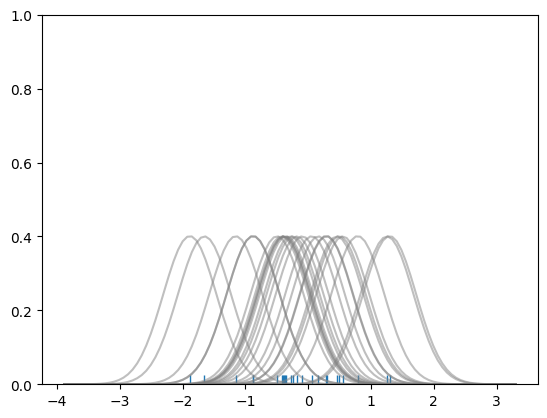

In [9]:


import numpy as np  
# Import NumPy for numerical operations and random number generation

import matplotlib.pyplot as plt  
# Import Matplotlib for plotting

from scipy import stats  
# Import SciPy stats module for probability distributions


# Create dataset
dataset = np.random.randn(25)  
# Generate 25 random values from a standard normal distribution (mean=0, std=1)


# Create another rugplot
sns.rugplot(dataset);  
# Draw a rug plot to show the distribution of individual data points on the x-axis


# Set up the x-axis for the plot
x_min = dataset.min() - 2  
# Define minimum x value slightly below the smallest data point

x_max = dataset.max() + 2  
# Define maximum x value slightly above the largest data point


# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)  
# Create 100 evenly spaced values between x_min and x_max


# Set up the bandwidth (used in Kernel Density Estimation)
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'  
# Reference link explaining bandwidth calculation (for theory only)

bandwidth = ((4 * dataset.std()**5) / (3 * len(dataset)))**.2  
# Calculate bandwidth using a common KDE approximation formula


# Create an empty kernel list
kernel_list = []  
# Initialize a list to store individual kernel functions


# Plot each basis function
for data_point in dataset:
    
    # Create a normal distribution (kernel) centered at each data point
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)  
    # Compute the probability density function values over x_axis
    
    kernel_list.append(kernel)  
    # Store each kernel in the list
    
    # Scale for plotting
    kernel = kernel / kernel.max()  
    # Normalize kernel so its maximum value equals 1
    
    kernel = kernel * .4  
    # Scale down height for better visualization
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)  
    # Plot each individual kernel curve in light grey with transparency


plt.ylim(0,1)  
# Set y-axis limits between 0 and 1 for cleaner visualization


Text(0.5, 0.98, 'Sum of the Basis Functions')

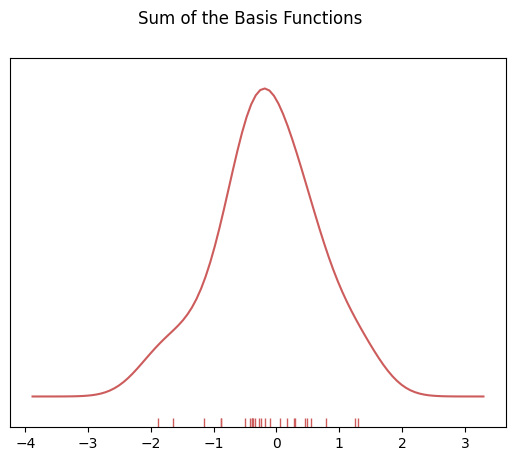

In [10]:
# To get the kde plot we can sum these basis functions.
# The overall KDE curve is obtained by summing all individual kernel functions

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)  
# Sum all kernel curves point-wise to create the final KDE curve


# Plot figure
fig = plt.plot(x_axis, sum_of_kde, color='indianred')  
# Plot the combined KDE curve using indian red color


# Add the initial rugplot
sns.rugplot(dataset, c='indianred')  
# Add a rug plot to show the original data points along the x-axis


# Get rid of y-tick marks
plt.yticks([])  
# Remove y-axis tick marks for cleaner visualization


# Set title
plt.suptitle("Sum of the Basis Functions")  
# Add a title to the entire figure
